In [1]:
!pip install -r requirements.txt

In [2]:
import numpy as np

In [3]:
from grid_world import GridWorld

In [4]:
from plots import plot_gridworld

In [5]:
from temporal_difference import sarsa

In [6]:
from temporal_difference import qlearning

In [7]:
# specify world parameters
num_rows = 10
num_cols = 10
start_state = np.array([[0, 4]]) # shape (1, 2)
goal_states = np.array([[0, 9], 
                        [2, 2], 
                        [8, 7]]) # shape (n, 2)

gw = GridWorld(num_rows=num_rows,
               num_cols=num_cols,
               start_state=start_state,
               goal_states=goal_states)

In [8]:
obstructions = np.array([[0,7],[1,1],[1,2],[1,3],[1,7],[2,1],[2,3],
                         [2,7],[3,1],[3,3],[3,5],[4,3],[4,5],[4,7],
                         [5,3],[5,7],[5,9],[6,3],[6,9],[7,1],[7,6],
                         [7,7],[7,8],[7,9],[8,1],[8,5],[8,6],[9,1]]) # shape (n, 2)
bad_states = np.array([[1,9],
                       [4,2],
                       [4,4],
                       [7,5],
                       [9,9]])      # shape (n, 2)
restart_states = np.array([[3,7],
                           [8,2]])  # shape (n, 2)

gw.add_obstructions(obstructed_states=obstructions,
                    bad_states=bad_states,
                    restart_states=restart_states)

In [9]:
gw.add_rewards(step_reward=-1,
               goal_reward=10,
               bad_state_reward=-6,
               restart_state_reward=-100)

In [10]:
gw.add_transition_probability(p_good_transition=0.7,
                              bias=0.5)

In [11]:
gw.add_discount(discount=0.9)
model = gw.create_gridworld()

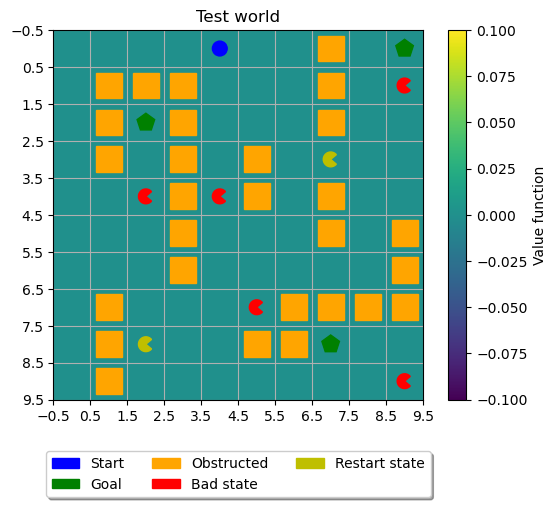

In [12]:
plot_gridworld(model, title="Test world")

In [13]:
from temporal_difference_3 import qlearning

In [14]:
from temporal_difference_3 import sarsa

Q+SOFTMAX

Experiment: 1
Running episode 0.
Running episode 1000.
Running episode 2000.
Running episode 3000.
Running episode 4000.
Running episode 5000.
Running episode 6000.
Running episode 7000.
Running episode 8000.
Running episode 9000.
Experiment: 2
Running episode 0.
Running episode 1000.
Running episode 2000.
Running episode 3000.
Running episode 4000.
Running episode 5000.
Running episode 6000.
Running episode 7000.
Running episode 8000.
Running episode 9000.


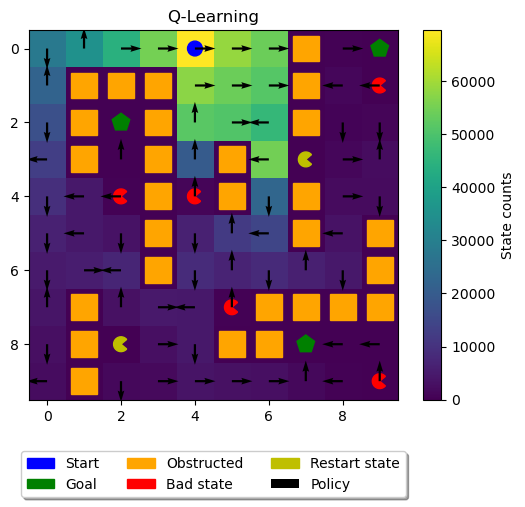

In [29]:
num_expts = 2
total_rewards, total_steps = [], []

for i in range(num_expts):
    print("Experiment: %d"%(i+1))

    # TODO: run sarsa, store metrics
    #Q, episode_rewards, steps_to_completion = qlearning(env, Q, choose_action=choose_action_softmax)
    q_function, pi, state_counts,steps,rewards = qlearning(model, alpha=0.9, epsilon=0.2, maxiter=100, maxeps=10000,action_strategy="softmax")
    total_steps.append(steps)
    total_rewards.append(rewards)

plot_gridworld(model, policy=pi, state_counts=state_counts, title="Q-Learning")

In [30]:
avg_steps=np.mean(np.array(total_steps), axis=0)
std_across_steps= np.std(np.array(total_steps), axis=0)

avg_rewards=np.mean(np.array(total_rewards), axis=0)
std_across_rewards= np.std(np.array(total_rewards), axis=0)

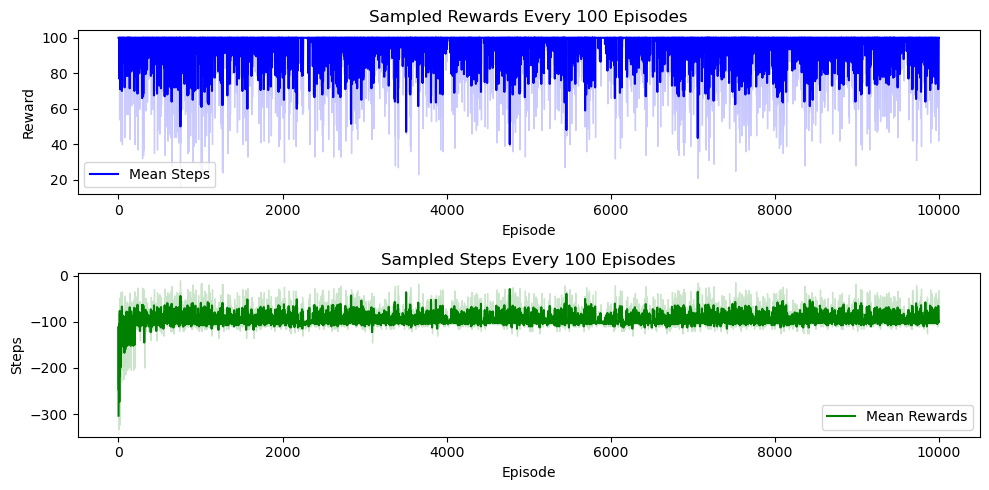

In [31]:
import matplotlib.pyplot as plt

# Replace 'your_rewards_list' and 'your_steps_list' with your actual data
# rewards = your_rewards_list
# steps = your_steps_list

# Create an array for episode numbers
episodes = range(1, len(rewards) + 1)

# Sample every 100 episodes
sampled_episodes = episodes[::25]
sampled_rewards = rewards[::25]
sampled_steps = steps[::25]

# Plotting rewards
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1
plt.plot(episodes, avg_steps, label='Mean Steps', color='blue')
plt.fill_between(episodes, avg_steps - std_across_steps, avg_steps + std_across_steps, alpha=0.2, color='blue')
plt.title('Sampled Rewards Every 100 Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()

# Plotting steps
plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2
plt.plot(episodes, avg_rewards, label='Mean Rewards', color='green')
plt.fill_between(episodes, avg_rewards - std_across_rewards, avg_rewards + std_across_rewards, alpha=0.2, color='green')
plt.title('Sampled Steps Every 100 Episodes')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Q+EPSILON

Running episode 0.
Running episode 1000.
Running episode 2000.
Running episode 3000.
Running episode 4000.
Running episode 5000.
Running episode 6000.
Running episode 7000.
Running episode 8000.
Running episode 9000.


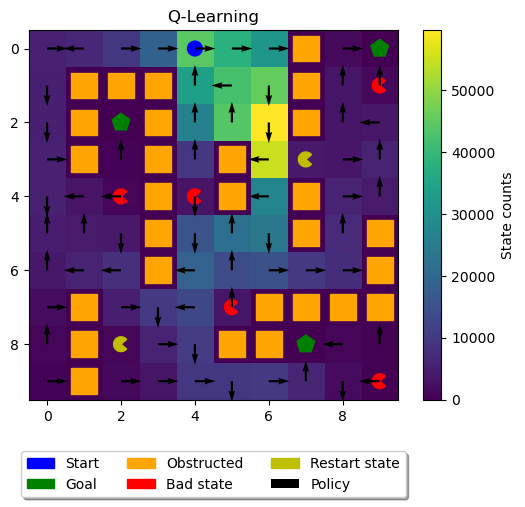

In [16]:

q_function, pi, state_counts,steps,rewards = qlearning(model, alpha=0.9, epsilon=0.2, maxiter=100, maxeps=10000,action_strategy="epsilon-greedy")
plot_gridworld(model, policy=pi, state_counts=state_counts, title="Q-Learning")

In [ ]:
import matplotlib.pyplot as plt

# Replace 'your_rewards_list' and 'your_steps_list' with your actual data
# rewards = your_rewards_list
# steps = your_steps_list

# Create an array for episode numbers
episodes = range(1, len(rewards) + 1)

# Sample every 100 episodes
sampled_episodes = episodes[::25]
sampled_rewards = rewards[::25]
sampled_steps = steps[::25]

# Plotting rewards
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1

plt.plot(sampled_episodes, sampled_rewards, label='Rewards', color='blue')
plt.title('Sampled Rewards Every 100 Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()

# Plotting steps
plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2

plt.plot(sampled_episodes, sampled_steps, label='Steps', color='green')
plt.title('Sampled Steps Every 100 Episodes')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


SARSA+EPSILON

Running episode 0.
Running episode 1000.
Running episode 2000.
Running episode 3000.
Running episode 4000.
Running episode 5000.
Running episode 6000.
Running episode 7000.
Running episode 8000.
Running episode 9000.


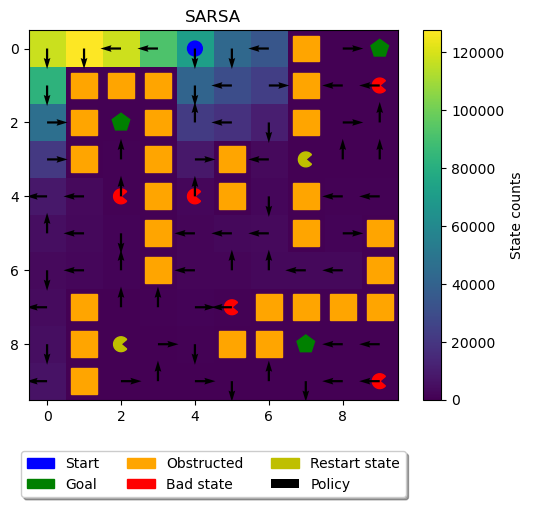

In [17]:

q_function, pi, state_counts,steps,rewards = sarsa(model, alpha=0.9, epsilon=0.2, maxiter=100, maxeps=10000,action_strategy="epsilon-greedy")
plot_gridworld(model, policy=pi, state_counts=state_counts, title="SARSA")

In [ ]:
import matplotlib.pyplot as plt

# Replace 'your_rewards_list' and 'your_steps_list' with your actual data
# rewards = your_rewards_list
# steps = your_steps_list

# Create an array for episode numbers
episodes = range(1, len(rewards) + 1)

# Sample every 100 episodes
sampled_episodes = episodes[::25]
sampled_rewards = rewards[::25]
sampled_steps = steps[::25]

# Plotting rewards
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1

plt.plot(sampled_episodes, sampled_rewards, label='Rewards', color='blue')
plt.title('Sampled Rewards Every 100 Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()

# Plotting steps
plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2

plt.plot(sampled_episodes, sampled_steps, label='Steps', color='green')
plt.title('Sampled Steps Every 100 Episodes')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


SARSA+SOFTMAX

Running episode 0.
Running episode 1000.
Running episode 2000.
Running episode 3000.
Running episode 4000.
Running episode 5000.
Running episode 6000.
Running episode 7000.
Running episode 8000.
Running episode 9000.


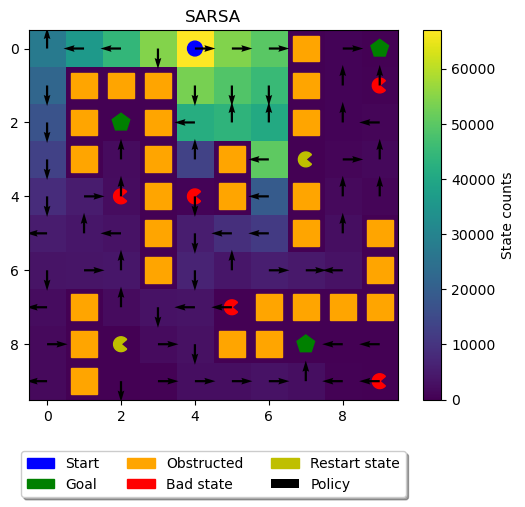

In [18]:

q_function, pi, state_counts,steps,rewards = sarsa(model, alpha=0.9, epsilon=0.2, maxiter=100, maxeps=10000,action_strategy="softmax")
plot_gridworld(model, policy=pi, state_counts=state_counts, title="SARSA")

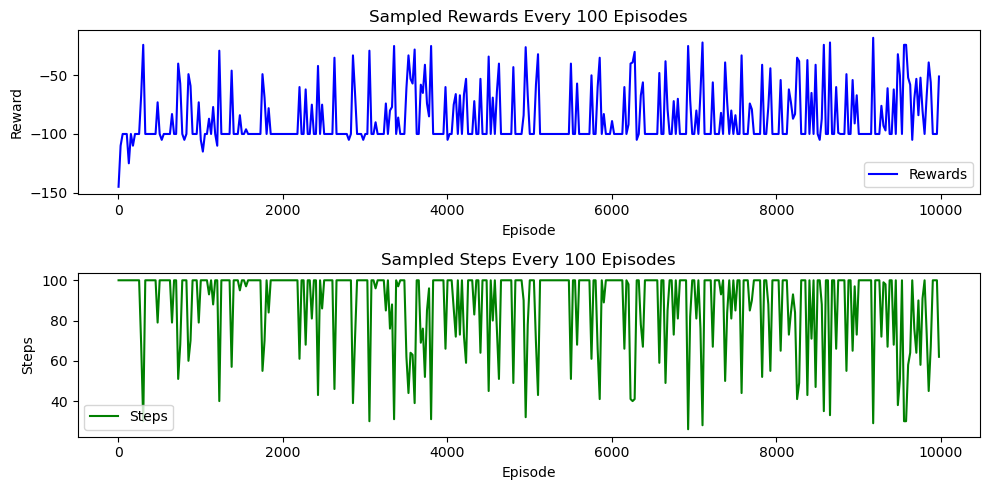

In [28]:
import matplotlib.pyplot as plt

# Replace 'your_rewards_list' and 'your_steps_list' with your actual data
# rewards = your_rewards_list
# steps = your_steps_list

# Create an array for episode numbers
episodes = range(1, len(rewards) + 1)

# Sample every 100 episodes
sampled_episodes = episodes[::25]
sampled_rewards = rewards[::25]
sampled_steps = steps[::25]

# Plotting rewards
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1

plt.plot(sampled_episodes, sampled_rewards, label='Rewards', color='blue')
plt.title('Sampled Rewards Every 100 Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()

# Plotting steps
plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2

plt.plot(sampled_episodes, sampled_steps, label='Steps', color='green')
plt.title('Sampled Steps Every 100 Episodes')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()
